# Axialni poloha iontu v zavislosti na napeti na axialnich elektrodach

In [1]:
using DelimitedFiles

## nacteni dat ze souboru
# pole generovano axialni elektrodou v + 2.25mm
z_data = readdlm("axial_field_unitary_rad_ax_delim.txt")[:,2]
#E_field_ax_data_old = readdlm("axial_field_unitary_rad_ax_delim.txt")[:,3]
E_field_ax_data = readdlm("axial_field_unitary_rad_ax_correct_ax_pos_delim.txt")[:,3] # spravna poloha axialnich elektrod

leng_data = length(z_data)
# nyni mam nacteny data ve stejnych bodech

50000

In [3]:
# import packagu pro ploceni
using PyPlot
using PyCall
using LaTeXStrings
using Formatting

# latex fonty
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";

Brat do uvahy vliv oscilujiciho pole na polohu iontu nema smysl, je to zanedbatelny vliv.

In [4]:
# definuju interpolacni fce

py"""
from scipy import interpolate

def pyinterp(z, E_field_data):
    return interpolate.interp1d(z, E_field_data, kind='quadratic')

"""
E_field_ax = py"pyinterp"(z_data, E_field_ax_data) # z zadavam v mm

PyObject <scipy.interpolate.interpolate.interp1d object at 0x7fe3220fd350>

In [9]:
U_dc_5 = 576.89
U_dc_6 = 423.11
delta_z_ax = [0, -40]*1e-3 # delta z 5, delta z 6  v [mm]   + znamena posuv ve smeru osy z pro obe elektrody


z_range = range(-0.1,0.1, length=1000)
# zde nalezam polohu iontu danou DC napetim na axialnich elektrodach
E_field_ax_dc = -U_dc_5 * E_field_ax(-(z_range.-delta_z_ax[1]) ) + U_dc_6 * E_field_ax(z_range.-delta_z_ax[2])
# index pruchodu nulou
min_ind = argmin(abs.(E_field_ax_dc)) # index nuloveho DC pole
z_pos_iont = z_range[ min_ind ] # pozice iontu

0.03433433433433433

Zkusim prozkoumat zavislost z_pos na alpha

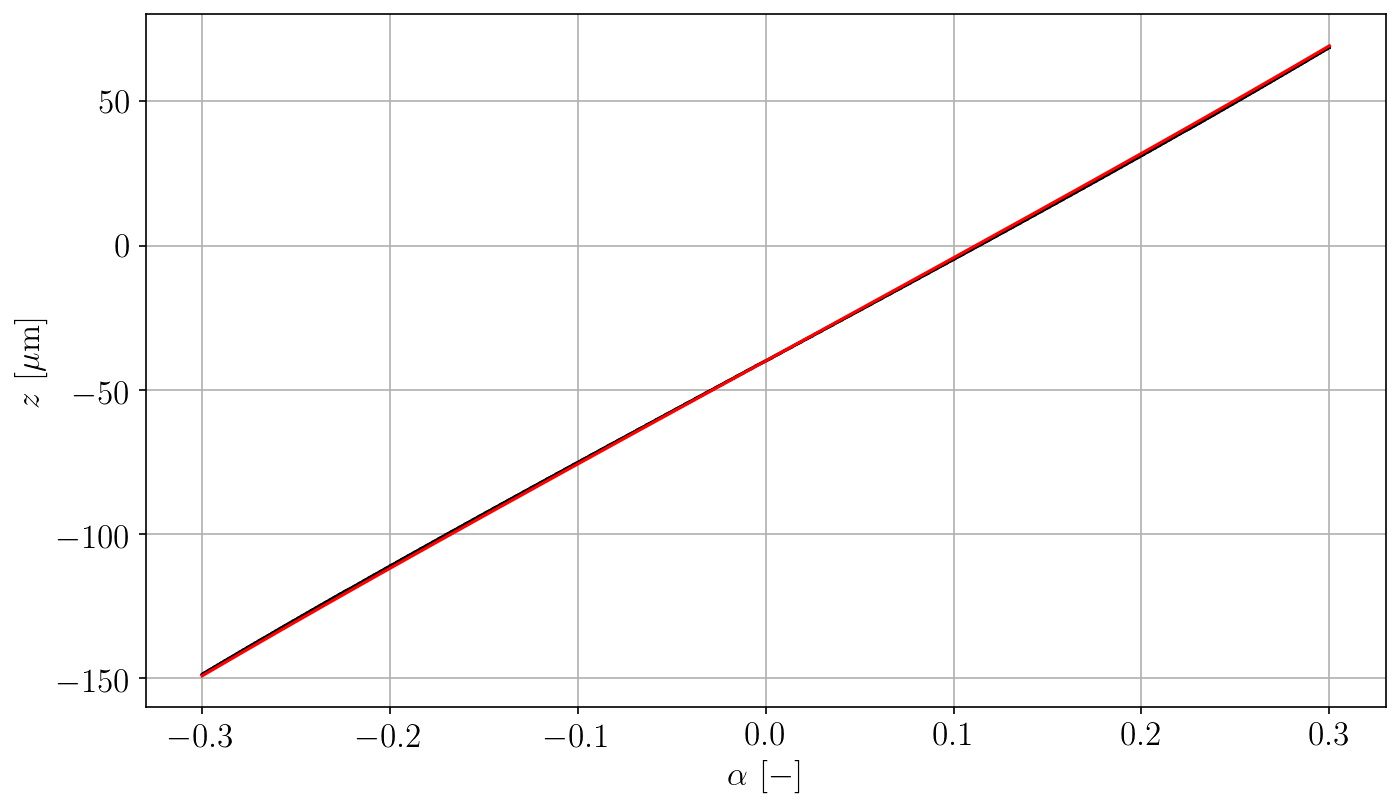

In [5]:
alpha = range(-0.3, 0.3, length=2000)
U_avg = 500
U = zeros((2,length(alpha)))
U[1,:] = U_avg * (1 .+ alpha)
U[2,:] = U_avg * (1 .- alpha)  # matice napeti

delta_z_ax = [-40, -40]*1e-3 # delta z 5, delta z 6  v [mm]   + znamena posuv ve smeru osy z pro obe elektrody

z_range = range(-0.2,0.2, length=length(alpha))
# zde nalezam polohu iontu danou DC napetim na axialnich elektrodach
E_field_ax_dc = - E_field_ax(-(z_range.-delta_z_ax[1]) ) * U[1,:]' .+  E_field_ax(z_range.-delta_z_ax[2]) * U[2,:]'

# index pruchodu nulou
min_ind = zeros((1,length(z_range)))
min_ind_cartes = argmin(abs.(E_field_ax_dc), dims=1)
for i in 1:length(z_range)
    min_ind[i] = min_ind_cartes[i][1]
end
min_ind = convert(Array{Int64,2}, min_ind) # konverze prvku na int

z_pos_iont = z_range[ min_ind ] # pozice iontu


# nafitovana zavislost z minula
a = 0.000357087248516796
b = 0.0000614272209845667
c = 0.000214572720416111

z_fit = a* alpha + b* alpha.^3 + c *alpha.^5 .+ sum(delta_z_ax)*1e-3 * 0.5  # nalezl jsem zkusmo spravny predpis
# z_fit = a* alpha + b* alpha.^3 + c *alpha.^5 
# z_fit = 4.3101/1.2262e-2 * alpha *1e-6 .+ 0.5*sum(delta_z_ax)*1e-3 # sedi celkem dobre

# plot
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

#line1 = x.plot(z_data[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_rf_amp[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")

line1 = x.plot(alpha, z_pos_iont'*1e3, color="black")
line2 = x.plot(alpha, z_fit*1e6, color="red")
# line2 = x.plot(z_data[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)]*1e3,
#     E_rf_amp_aux[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)], color="blue", label="E_z")

x.set_xlabel(L"\alpha \,\, \rm{[-]}", fontsize=16)
x.set_ylabel(L"z \, \, \rm{[\mu m]}", fontsize=16)

x.grid()
#x.legend(framealpha=1)

zkusim jedno napeti nechat fixni a druhe menit

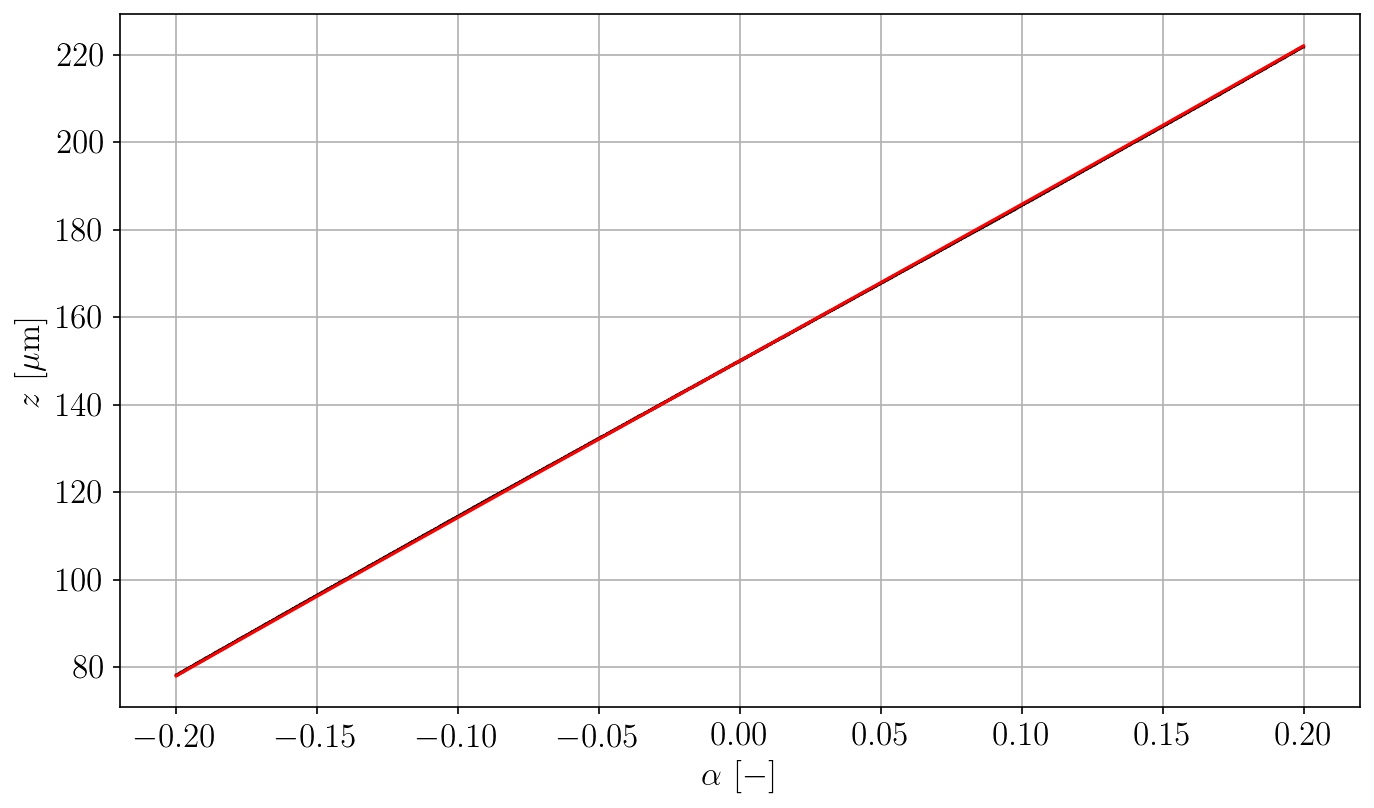

In [19]:
alpha = range(-0.2, 0.2, length=2000)
U_avg = 1000
U = zeros((2,length(alpha)))
U[1,:] = U_avg * (1 .+ alpha) ./ (1 .- alpha)
U[2,:] = U_avg * (1 .+ 0 * alpha)   # matice napeti


delta_z_ax = [100, 200]*1e-3 # delta z 5, delta z 6  v [mm]   + znamena posuv ve smeru osy z pro obe elektrody

z_range = range(-0.25,0.25, length=length(alpha))
# zde nalezam polohu iontu danou DC napetim na axialnich elektrodach
E_field_ax_dc = - E_field_ax(-(z_range.-delta_z_ax[1]) ) * U[1,:]' .+  E_field_ax(z_range.-delta_z_ax[2]) * U[2,:]'

# index pruchodu nulou
min_ind = zeros((1,length(z_range)))
min_ind_cartes = argmin(abs.(E_field_ax_dc), dims=1)
for i in 1:length(z_range)
    min_ind[i] = min_ind_cartes[i][1]
end
min_ind = convert(Array{Int64,2}, min_ind) # konverze prvku na int

z_pos_iont = z_range[ min_ind ] # pozice iontu


# nafitovana zavislost z minula
a = 0.000357087248516796
b = 0.0000614272209845667
c = 0.000214572720416111

z_fit = a* alpha + b* alpha.^3 + c *alpha.^5 .+ sum(delta_z_ax)*1e-3 * 0.5  # nalezl jsem zkusmo spravny predpis
# z_fit = a* alpha + b* alpha.^3 + c *alpha.^5 
# z_fit = 4.3101/1.2262e-2 * alpha *1e-6 .+ (U[1,:] * delta_z_ax[1] .+ U[2,:] * delta_z_ax[2])*1e-3 ./ (U[1,:] .+ U[2,:])   # sedi celkem dobre
# z_fit = 4.3101/1.2262e-2 * alpha *1e-6 .+ sum(delta_z_ax)*1e-3 * 0.5 
# plot
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

#line1 = x.plot(z_data[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_rf_amp[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")

line1 = x.plot(alpha, z_pos_iont'*1e3, color="black")
line2 = x.plot(alpha, z_fit*1e6, color="red")
# line2 = x.plot(z_data[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)]*1e3,
#     E_rf_amp_aux[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)], color="blue", label="E_z")

x.set_xlabel(L"\alpha \,\, \rm{[-]}", fontsize=16)
x.set_ylabel(L"z \, \, \rm{[\mu m]}", fontsize=16)

x.grid()
#x.legend(framealpha=1)

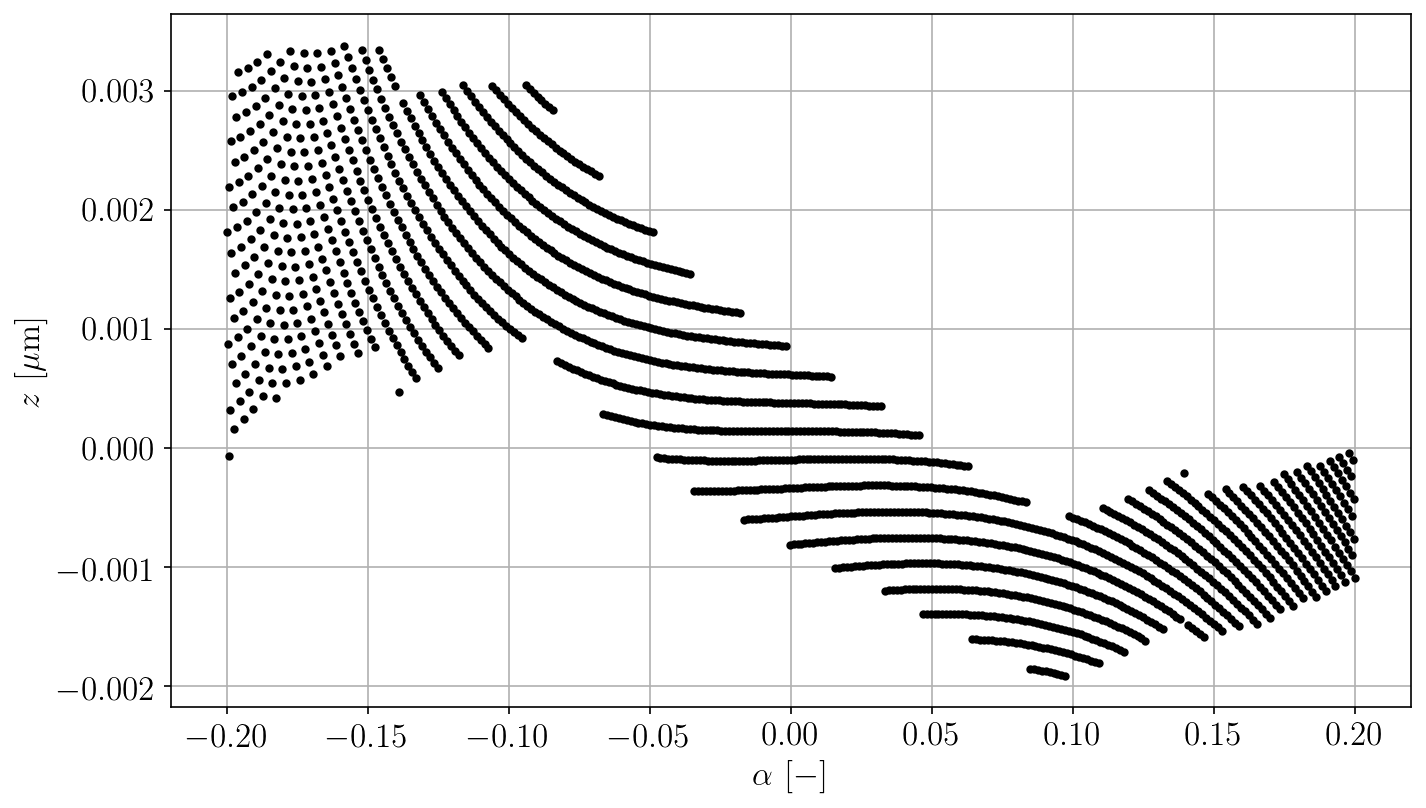

In [20]:
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

#line1 = x.plot(z_data[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_rf_amp[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")

line1 = x.plot(alpha, (z_pos_iont'*1e3 .- z_fit*1e6)./(z_fit*1e6), color="black", ".")
# line1 = x.plot(alpha, z_pos_iont'*1e3 .- z_fit*1e6, color="black")
# line2 = x.plot(z_data[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)]*1e3,
#     E_rf_amp_aux[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)], color="blue", label="E_z")

x.set_xlabel(L"\alpha \,\, \rm{[-]}", fontsize=16)
x.set_ylabel(L"z \, \, \rm{[\mu m]}", fontsize=16)

x.grid()
#x.legend(framealpha=1)

## plot do diplomky

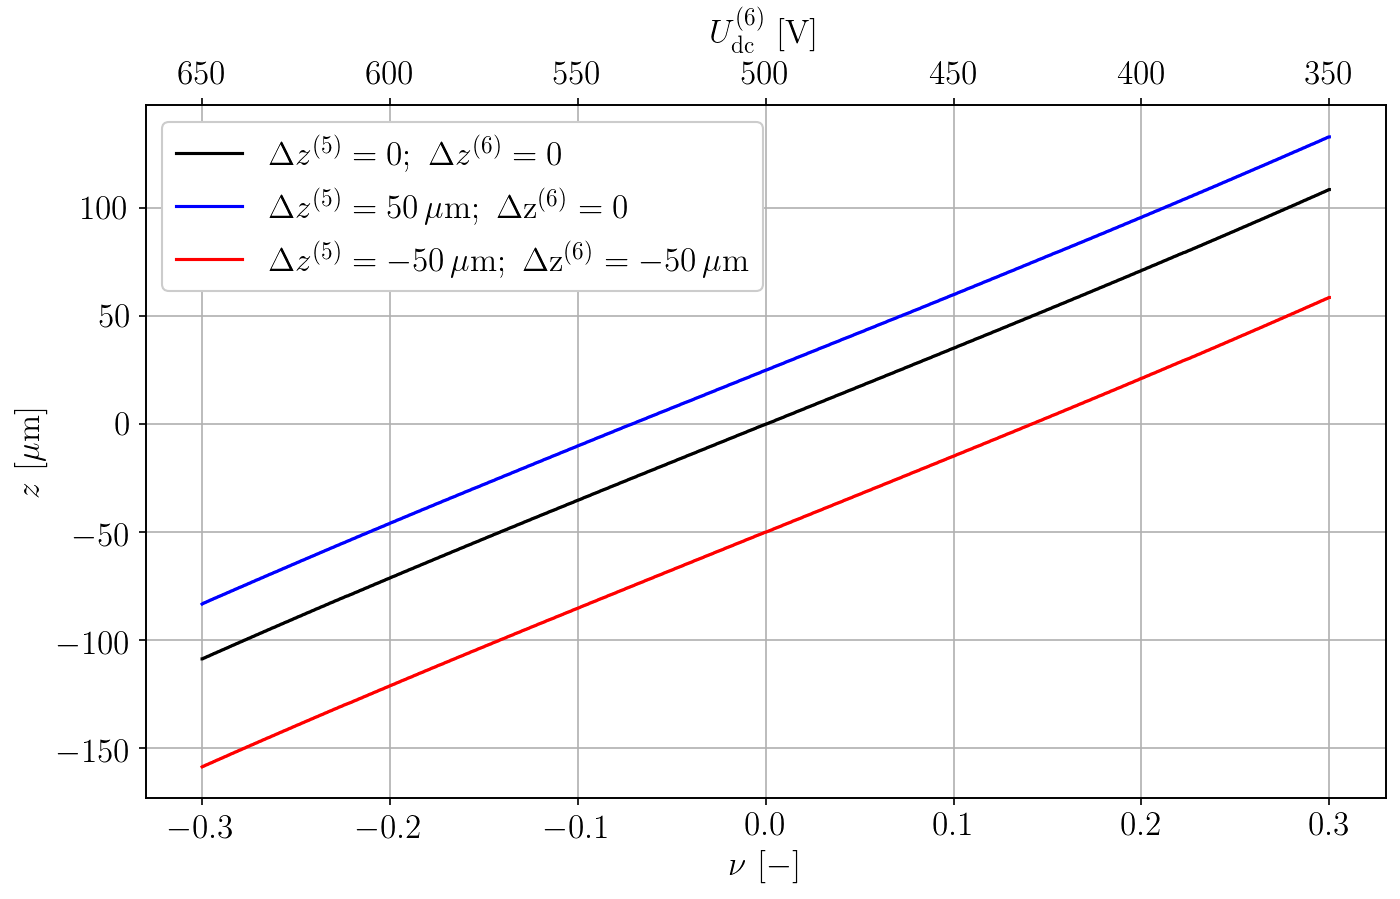

In [101]:
alpha = range(-0.3, 0.3, length=2000)
U_avg = 500
U = zeros((2,length(alpha)))
U[1,:] = U_avg * (1 .+ alpha)  # U5
U[2,:] = U_avg * (1 .- alpha)  # matice napeti  U6



delta_z_ax = [0, 0] # delta z 5, delta z 6  v [um]   + znamena posuv ve smeru osy z pro obe elektrody

z_range = range(-200,200, length=length(alpha)) # v[um]
# zde nalezam polohu iontu danou DC napetim na axialnich elektrodach
E_field_ax_dc = - E_field_ax(-(z_range.-delta_z_ax[1])*1e-3 ) * U[1,:]' .+  E_field_ax(z_range*1e-3.-delta_z_ax[2]*1e-3) * U[2,:]'

# index pruchodu nulou
min_ind = zeros((1,length(z_range)))
min_ind_cartes = argmin(abs.(E_field_ax_dc), dims=1)
for i in 1:length(z_range)
    min_ind[i] = min_ind_cartes[i][1]
end
min_ind = convert(Array{Int64,2}, min_ind) # konverze prvku na int

z_pos_iont = z_range[ min_ind ] # pozice iontu


# nafitovana zavislost z minula
a = 0.000357087248516796 *1e6
b = 0.0000614272209845667 *1e6
c = 0.000214572720416111 *1e6

z_fit = a* alpha + b* alpha.^3 + c *alpha.^5 .+ sum(delta_z_ax) * 0.5  # nalezl jsem zkusmo spravny predpis
# z_fit = a* alpha + b* alpha.^3 + c *alpha.^5 
# z_fit = 4.3101/1.2262e-2 * alpha *1e-6 .+ 0.5*sum(delta_z_ax)*1e-3 # sedi celkem dobre

# plot
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

#line1 = x.plot(z_data[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_rf_amp[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")

line1 = x.plot(alpha, z_pos_iont', color="black", 
    label=replace(format(L"$\Delta z^{{(5)}} = {:.0f} ;\ \Delta z^{{(6)}} = {:.0f}$",delta_z_ax[1], delta_z_ax[2] ), "." => "" ) )
# line2 = x.plot(alpha, z_fit, color="red")
# line2 = x.plot(z_data[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)]*1e3,
#     E_rf_amp_aux[round(Int64,1*leng_data/3):round(Int64,2*leng_data/3)], color="blue", label="E_z")



#------------------------------------------------------ dalsi posuv plot
delta_z_ax = [50, 0] # delta z 5, delta z 6  v [um]   + znamena posuv ve smeru osy z pro obe elektrody
E_field_ax_dc = - E_field_ax(-(z_range.-delta_z_ax[1])*1e-3 ) * U[1,:]' .+  E_field_ax(z_range*1e-3.-delta_z_ax[2]*1e-3) * U[2,:]'

# index pruchodu nulou
min_ind = zeros((1,length(z_range)))
min_ind_cartes = argmin(abs.(E_field_ax_dc), dims=1)
for i in 1:length(z_range)
    min_ind[i] = min_ind_cartes[i][1]
end
min_ind = convert(Array{Int64,2}, min_ind) # konverze prvku na int

z_pos_iont = z_range[ min_ind ] # pozice iontu
# nafitovana zavislost z minula
a = 0.000357087248516796 *1e6
b = 0.0000614272209845667 *1e6
c = 0.000214572720416111 *1e6

z_fit = a* alpha + b* alpha.^3 + c *alpha.^5 .+ sum(delta_z_ax) * 0.5  # nalezl jsem zkusmo spravny predpis
line3 = x.plot(alpha, z_pos_iont', color="blue",
                label=replace(format(L"$\Delta z^{{(5)}} = {:.0f} \,\rm \mu m ;\ \Delta z^{{(6)}} = {:.0f} $",delta_z_ax[1], delta_z_ax[2] ), "." => "" ))
# line4 = x.plot(alpha, z_fit, color="red")
#------------------------------------------------------------------

#------------------------------------------------------ dalsi posuv plot
delta_z_ax = [-50, -50] # delta z 5, delta z 6  v [um]   + znamena posuv ve smeru osy z pro obe elektrody
E_field_ax_dc = - E_field_ax(-(z_range.-delta_z_ax[1])*1e-3 ) * U[1,:]' .+  E_field_ax(z_range*1e-3.-delta_z_ax[2]*1e-3) * U[2,:]'

# index pruchodu nulou
min_ind = zeros((1,length(z_range)))
min_ind_cartes = argmin(abs.(E_field_ax_dc), dims=1)
for i in 1:length(z_range)
    min_ind[i] = min_ind_cartes[i][1]
end
min_ind = convert(Array{Int64,2}, min_ind) # konverze prvku na int

z_pos_iont = z_range[ min_ind ] # pozice iontu
# nafitovana zavislost z minula
a = 0.000357087248516796 *1e6
b = 0.0000614272209845667 *1e6
c = 0.000214572720416111 *1e6

z_fit = a* alpha + b* alpha.^3 + c *alpha.^5 .+ sum(delta_z_ax) * 0.5  # nalezl jsem zkusmo spravny predpis
line5 = x.plot(alpha, z_pos_iont', color="red", 
                label=replace(format(L"$\Delta z^{{(5)}} = {:.0f} \,\rm \mu m ;\ \Delta z^{{(6)}} = {:.0f}\,\rm \mu m $",delta_z_ax[1], delta_z_ax[2] ), "." => "" ))
# line6 = x.plot(alpha, z_fit, color="red")
#------------------------------------------------------------------

# zkusim pridat na horni x- osu ticky napeti
x2 = x.twiny()
xt = x.get_xticks()
invisibleline = x2.plot(U[2,:],z_pos_iont', alpha=0)  # pomocna line abychom naskalovali horni osu
x2.invert_xaxis()
# x3 = x.twiny()
# invisibleline2 = x3.plot(U[1,:],z_pos_iont', alpha=0)  # pomocna line abychom naskalovali horni osu

# x2.set_xticks(xt)

x.set_xlabel(L"\nu \,\, \rm{[-]}", fontsize=16)
x.set_ylabel(L"z \, \, \rm{[\mu m]}", fontsize=16)
x2.set_xlabel(L"U_{\rm dc}^{(6)} \,\, \rm [V]", fontsize=16)

x.grid()
x.legend(framealpha=1)

# savuju figure
plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/axial_pos_vs_nu.svg", bbox_inches="tight")

In [95]:
replace(format(L"$\Delta z^{{(6)}} = {:.0f}$",delta_z_ax[1] ), "." => "" )

"\$\\Delta z^{(6)} = 0\$"

In [96]:
format(L"$\Delta z^{{(6)}} = {:.0f}$",delta_z_ax[1] )

"\$\\Delta z^{(6)} = 0.\$"